# Exercise 3: Ensemble of Batman Trees

In [10]:
import numpy as np

In [11]:
X = np.loadtxt('bm.csv', delimiter=',', dtype='float64', usecols=(0,1))
y = np.loadtxt('bm.csv', delimiter=',', dtype='float64', usecols=2)

Here we split the data, 9000 for the training, 1000 for the test and using a random state.

In [26]:
n_samples = X.shape[0]
np.random.seed(10)
indices = np.random.permutation(n_samples)
split_point = int(n_samples * 0.90)
train_indices = indices[:split_point]
test_indices = indices[split_point:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [27]:
from numpy.random import default_rng
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
rng = np.random.default_rng()
from matplotlib.colors import ListedColormap

n = 5000
r = np.zeros([n, 100], dtype=int)
XX = np.zeros([n,2,100])
yy = np.zeros([n, 100])

trees = []
for i in range(100):
    r[: , i] = rng . choice (n , size = n , replace = True )
    XX[: ,: , i] = X_train[r [: , i], :]
    yy[:, i] = y_train[r[:,i]]
    tree = DecisionTreeClassifier()
    tree.fit(XX[:, :, i], yy[:, i])
    trees.append(tree)

### The estimate of the generalization error:

In [28]:
# Here is the prediction of each tree on the testing data
individual_tree_predictions = [tree.predict(X_test) for tree in trees]
ensemble_predictions = np.round(np.average(individual_tree_predictions, axis=0)).astype(int)
generalization_error = (1/len(y_test)) * np.square(np.sum(y_test - ensemble_predictions))
print(generalization_error)

0.004


### The average estimated generalization error of the individual decision trees

In [29]:
# Now we need to calculate the average estimated error of the individual decision tree
# Which means calculate individual mse and then make the average 
# 1 calculate individual mse
g_error = []
for tree in trees:
    y_predict = tree.predict(X_test)
    generalization_error = (1 / len(y_predict)) * np.square(np.sum(y_test - y_predict))
    g_error.append(generalization_error)
# 2 make the average
g_error = np.average(g_error)
print(g_error)

0.025920000000000002


### Plot the decision boundary of all models

In [30]:
def print_decision(tree, X_test, i, ax):
    h = 0.1
    X_min, X_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    Y_min, Y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xxx, yyy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
    x1, x2 = xxx.ravel(), yyy.ravel()
    XXe = np.c_[x1, x2]
    p = tree.predict(XXe)
    classes = p > 0.5
    clz_mesh = classes.reshape(xxx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # plt.figure(i)
    plt.pcolormesh(xxx, yyy, clz_mesh, cmap=cmap_light)

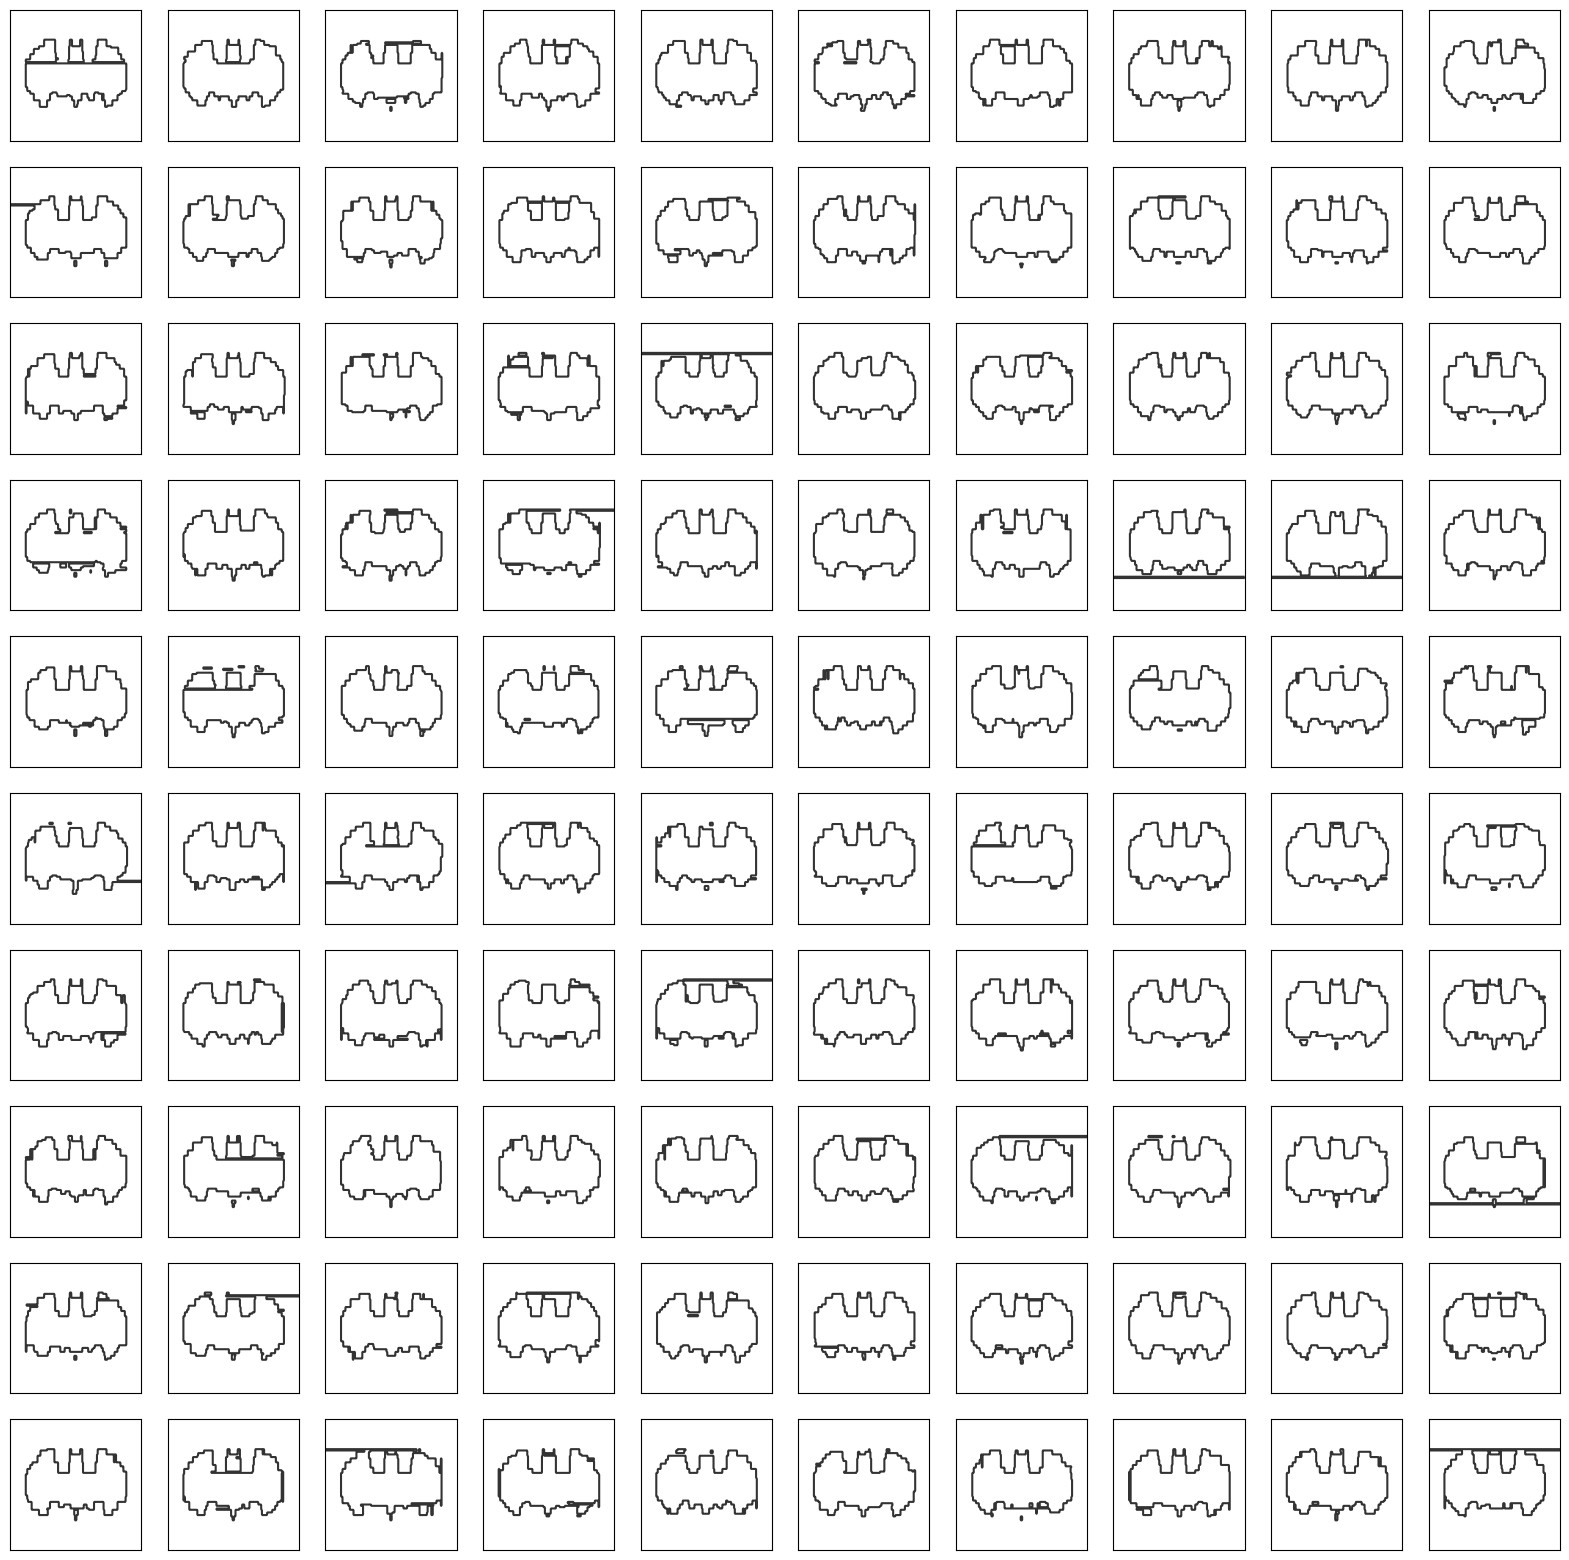

In [31]:
figure, axes = plt.subplots(10, 10, figsize=(20, 20))
for i in range(len(trees)):
    ax = plt.subplot(10, 10, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    h = 0.1
    X_min, X_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    Y_min, Y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xxx, yyy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
    x1, x2 = xxx.ravel(), yyy.ravel()
    XXe = np.c_[x1, x2]
    p = trees[i].predict(XXe)
    classes = p > 0.5
    clz_mesh = classes.reshape(xxx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.contour(xxx, yyy, clz_mesh, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)
plt.show()


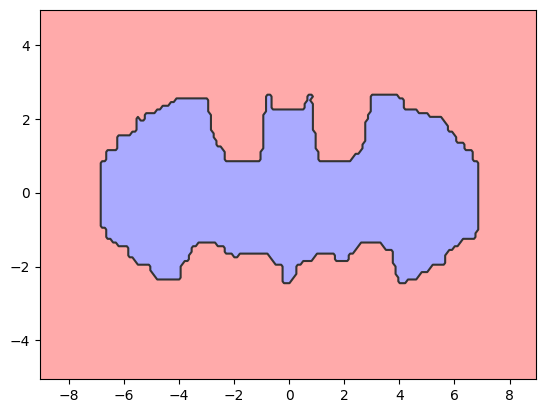

In [32]:
from matplotlib.colors import ListedColormap

def model_predict(X):
    individual_tree_predictions = [tree.predict(X) for tree in trees]
    ensemble_predictions = np.round(np.mean(individual_tree_predictions, axis=0)).astype(int)
    return ensemble_predictions
    
h = 0.1
X_min, X_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Y_min, Y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xxx, yyy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
x1, x2 = xxx.ravel(), yyy.ravel()
XXe = np.c_[x1, x2]
p = model_predict(XXe)
classes = p > 0.5
clz_mesh = classes.reshape(xxx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(2)
plt.pcolormesh(xxx, yyy, clz_mesh, cmap=cmap_light)
plt.contour(xxx, yyy, clz_mesh, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)
plt.show()

## Discussion

To comment the results, we can see that the generalization errors of all the trees is smaller than the average of the generalization error for each tree. It was expected as we understood that the common behavior would give better results that the average of each results. That explains the difference in results.
The benefits of this methods shows that the more trees we have the more accurate we can eventually be.
This explain why the batman seems better with the combination of all trees rather than one by one.